## Import libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

c:\Users\tote_\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Import df

In [2]:
# Cambiar directorio
os.chdir("..")

In [3]:
df = pd.read_csv("data/churn.csv")

## Pre-processing of df

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df_categoricas = df.select_dtypes(include=['object','category'])
df_numericas = df.select_dtypes(include='number')

In [7]:

colums = df_categoricas.columns
print(colums)
for x in colums:
    print(df[x].unique())
    


Index(['Surname', 'Geography', 'Gender'], dtype='object')
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['France' 'Spain' 'Germany']
['Female' 'Male']


In [8]:
colums_num = df_numericas.columns
print(colums_num)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [9]:
df_numericas.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## We get rid of columns that don't contribute much

In [11]:
df = df.drop(df.columns[0:3], axis=1)

### We convert the data into categorical format

In [12]:
column_equivalence = {}
features = list(df.columns)
for i, column in enumerate(list([str(d) for d in df.dtypes])):
    if column == "object":
        df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode())
        categorical_column = df[df.columns[i]].astype("category")
        current_column_equivalence = dict(enumerate(categorical_column.cat.categories))
        column_equivalence[i] = dict((v,k) for k,v in current_column_equivalence.items())
        df[df.columns[i]] = categorical_column.cat.codes
    else:
        df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].median())

In [13]:
column_equivalence

{1: {'France': 0, 'Germany': 1, 'Spain': 2}, 2: {'Female': 0, 'Male': 1}}

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## df exploration

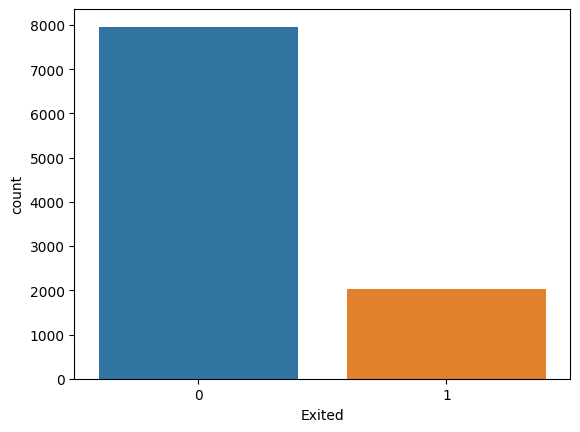

In [15]:
sns.countplot(data=df , x='Exited');

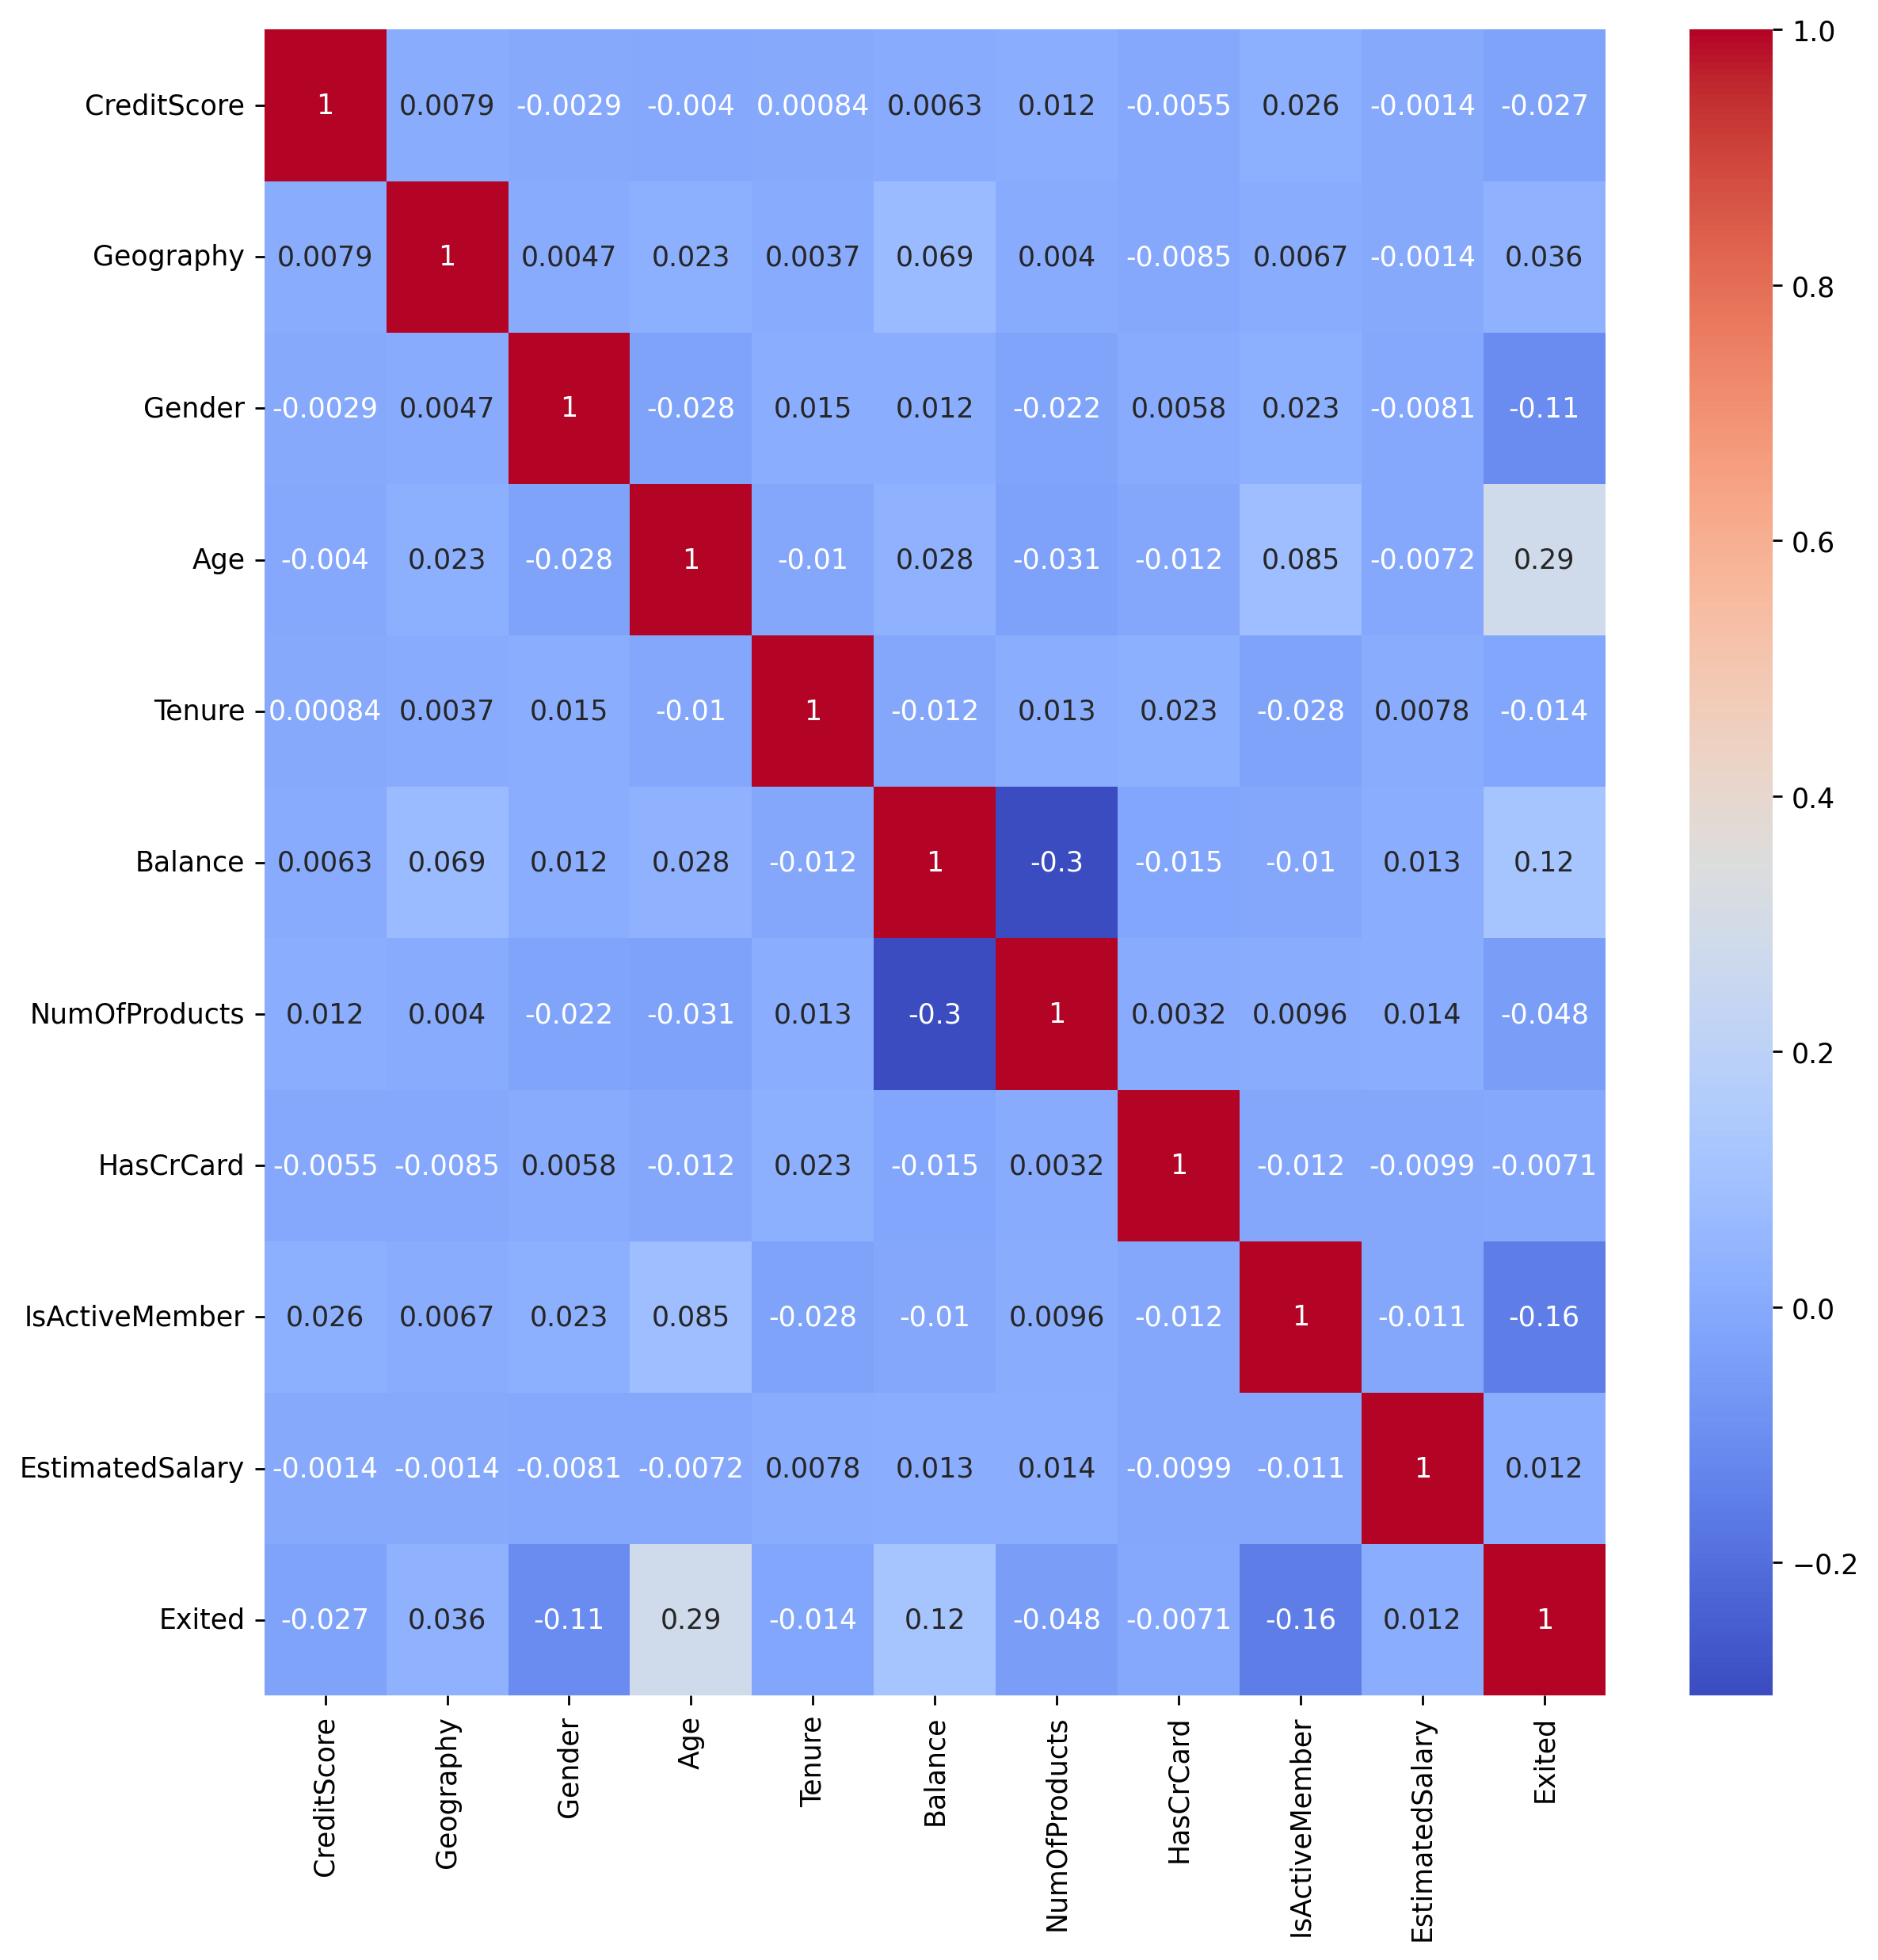

In [23]:
plt.figure(figsize=(10,10) , dpi=250 , tight_layout=True )
sns.heatmap(df.corr() , annot=True , cmap='coolwarm');

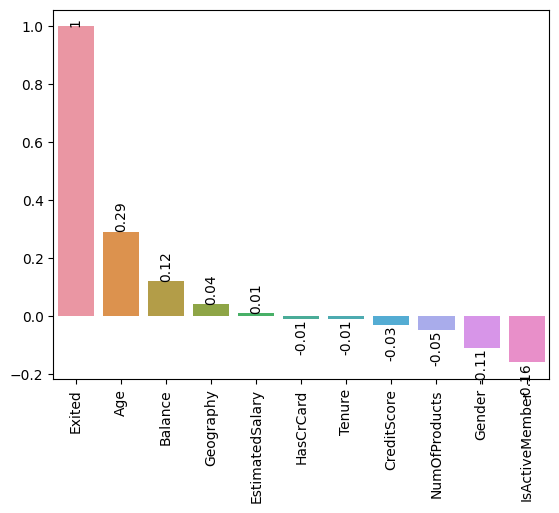

In [24]:
import pandas as pd

df_aux = df.corr()['Exited'].sort_values(ascending=False).round(2)
ax = sns.barplot(x=df_aux.index,y=df_aux.values)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0],rotation=90)
plt.show()


In [25]:
#sns.pairplot(df, hue='Exited')

## undersampling

c:\Users\tote_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


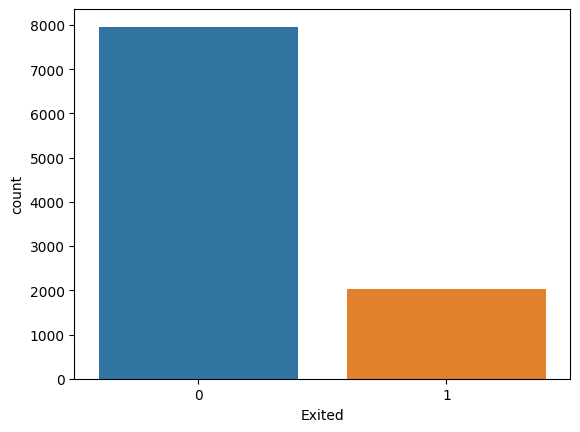

In [26]:
sns.countplot(df.Exited)
plt.show()

In [28]:
X = df.drop('Exited' , axis=1)
y = df['Exited']

In [29]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [30]:
X = df.drop('Exited',axis=1)
y = df.Exited

In [31]:
X_over , y_over = undersample.fit_resample(X,y)

c:\Users\tote_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


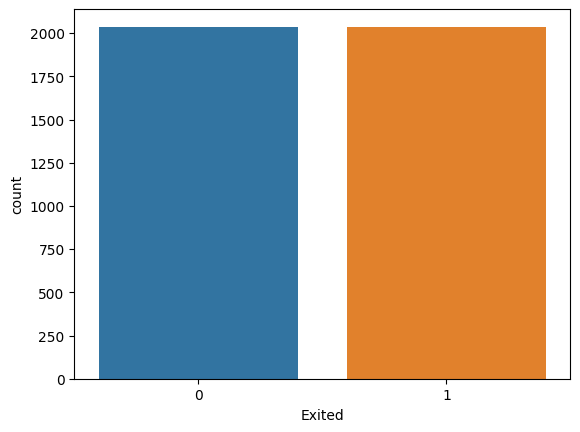

In [32]:
sns.countplot(y_over)
plt.show()

In [33]:
df.shape

(10000, 11)

In [35]:
X_over.shape

(4074, 10)

### Corrrelations

In [36]:
df_dea = X_over
df_dea['Exited'] = y_over

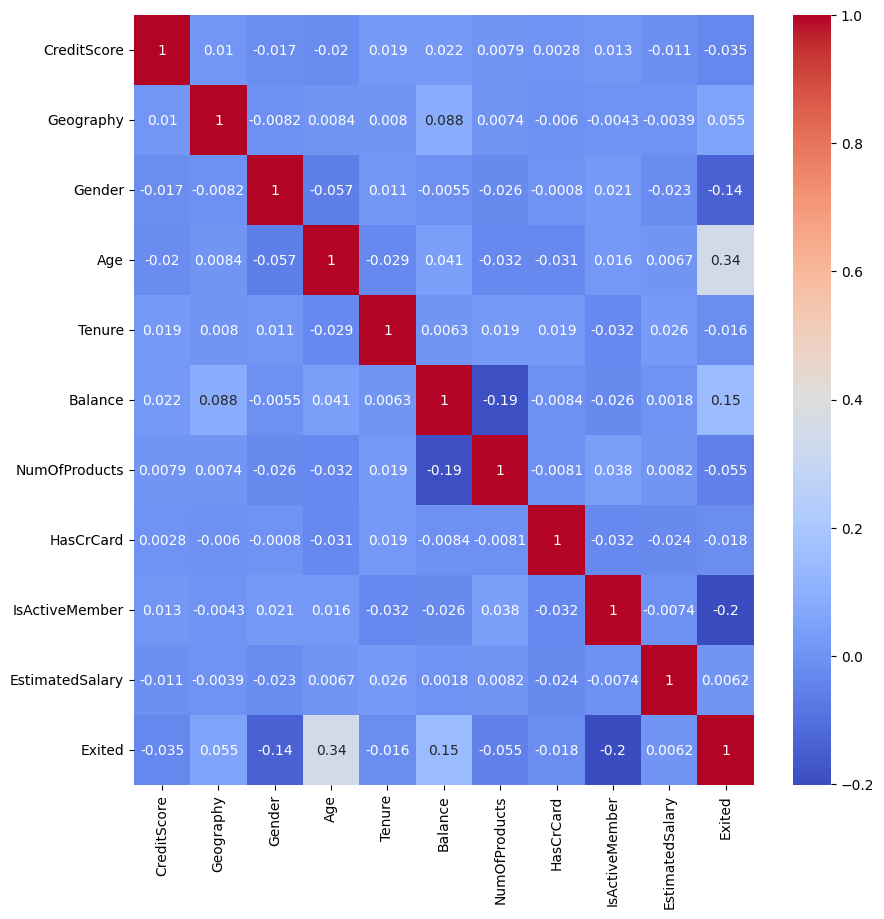

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df_dea.corr(), annot=True, cmap='coolwarm')
plt.show()

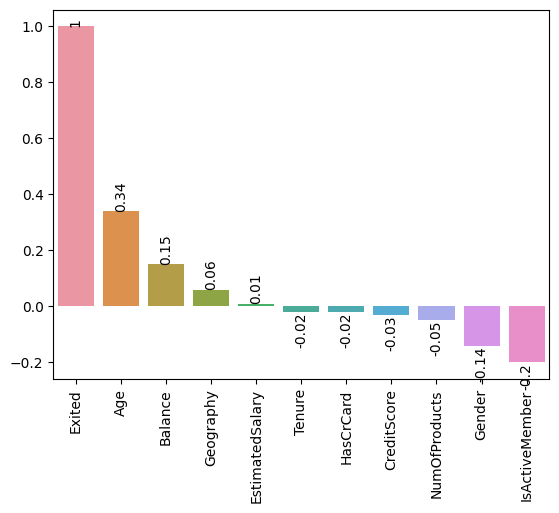

In [38]:
df_aux = df_dea.corr()['Exited'].sort_values(ascending=False).round(2)
ax = sns.barplot(x=df_aux.index,y=df_aux.values)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0],rotation=90)
plt.show()


In [39]:
#sns.pairplot(df_dea, hue='Exited')

In [40]:
df_dea.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Split and data scaling

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

## Training the model

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_X_train,y_train)

LogisticRegression()

## Assessing the model

In [45]:
y_pred = model.predict(scaled_X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

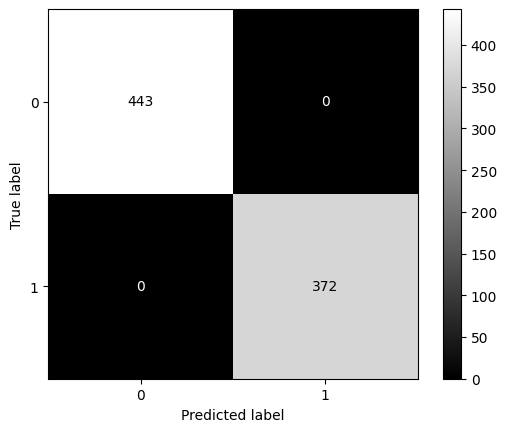

1.0


In [49]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()
print(accuracy_score(y_test, y_pred))